## Import all the Libraries

In [135]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
#from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

## Import dataset

In [136]:
#Loading dataset
data=pd.read_excel("Tourism.xlsx")

## Read first and last 5 rows of data and check for number of rows and columns

In [137]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [138]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [139]:
data.shape

(4888, 20)

#### We have about 4888 rows and 20 columns

### Check Data types and null values

In [140]:
data.info() # check for data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [12]:
data.isna().sum() # Let us check for null values

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

#### We have null values across Age, TypeofContact, DurationOfPitch, NumberOfFollowups,PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome

In [13]:
data.nunique() # let us check for unique values

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

#### We can use above data to convert few variables to categorical "TypeofContact","CityTier","Occupation","Gender","NumberOfPersonVisiting","ProductPitched","PreferredPropertyStar","MaritalStatus","Passport","PitchSatisfactionScore","OwnCar","NumberOfChildrenVisiting","Designation".

In [149]:
## Converting the data type of categorical features to 'category'
#cat_cols = ['ProdTaken','TypeofContact', 'CityTier', 'Occupation', 'Gender','ProductPitched', 'PreferredPropertyStar','MaritalStatus','Passport','OwnCar', 'Designation']
cat_cols =["TypeofContact","CityTier","Occupation","Gender","NumberOfPersonVisiting","ProductPitched","PreferredPropertyStar","MaritalStatus","Passport","PitchSatisfactionScore","OwnCar","NumberOfChildrenVisiting","Designation"]
data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   category
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [151]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.00,22347.0,25571.00,98678.0


In [152]:
data.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
NumberOfPersonVisiting,4888,5,3,2402
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466


In [17]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in NumberOfPersonVisiting are :
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King        

# Exploratory Data Analysis
## Uinivariate analysis

In [144]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Observation on Age

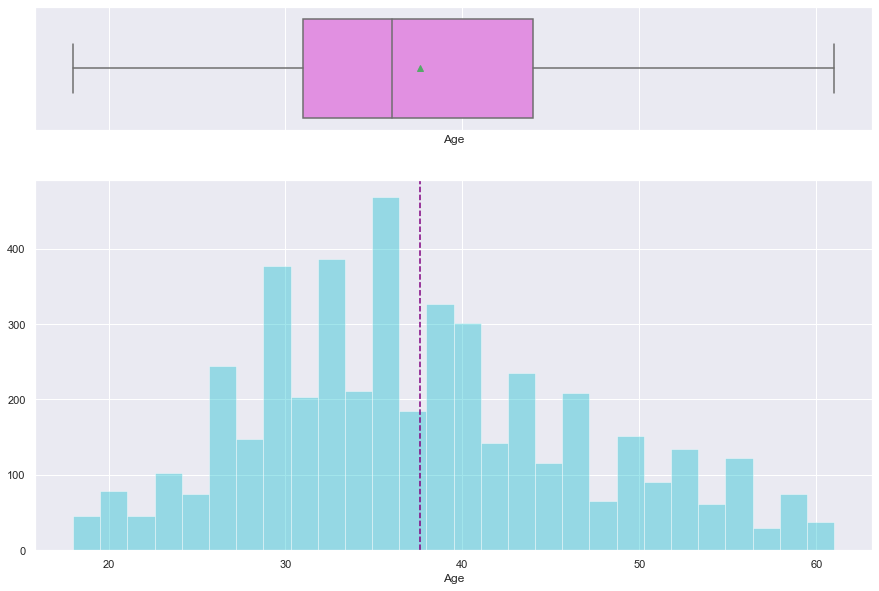

In [155]:
histogram_boxplot(data['Age'])

#### The distribution of Age is fairly symmetrical about the mean and the median. Mean is slightly less than Median
#### The mean and median age of customers is almost equal to 36 and 38.

## Observation On Duration Of Pitch

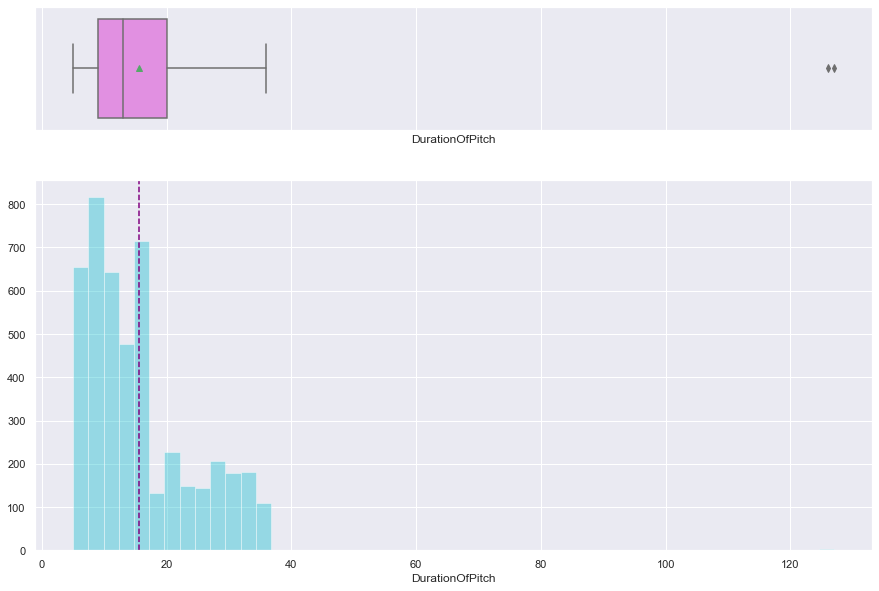

In [146]:
histogram_boxplot(data['DurationOfPitch'])

####  The distribution  is Right skewed. Mean is slightly more than Median
#### The mean and median of customers is almost equal to 18 and 16.

## Observation On NumberOfFollowups

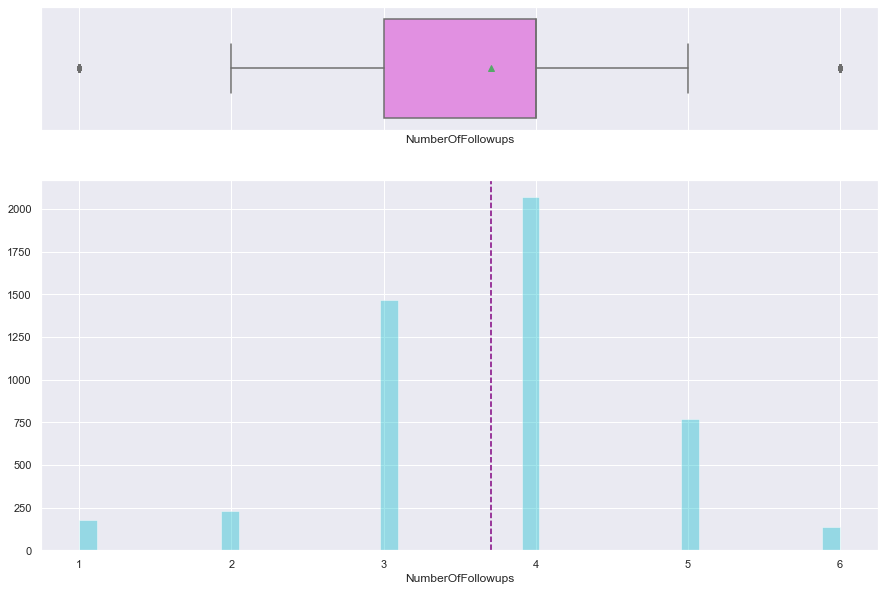

In [153]:
histogram_boxplot(data['NumberOfFollowups'])

#### The distribution  is fairly symmetrical about the mean and the median. Mean is slightly less than Median
#### The mean and median age of customers is almost equal to 3.7 and 4.

## Observation On NumberOfTrips

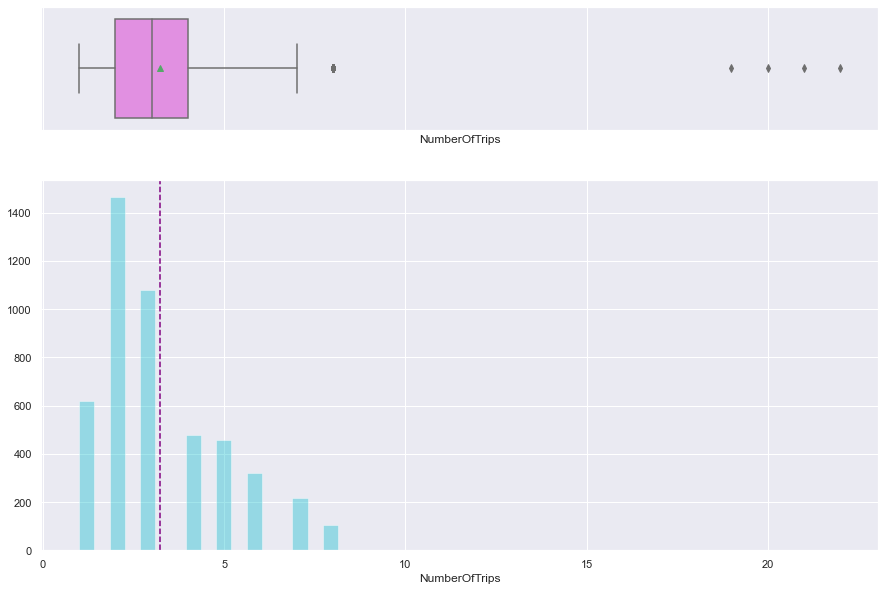

In [154]:
histogram_boxplot(data['NumberOfTrips'])

####  The distribution  is Right skewed. Mean is slightly more than Median
#### The mean and median of customers is almost equal to 3.

## Observation On MonthlyIncome

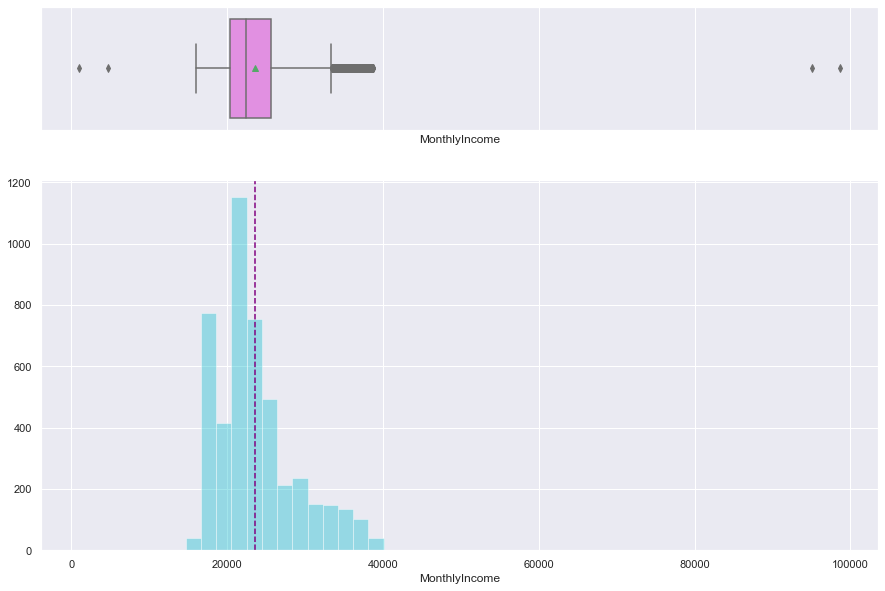

In [147]:
histogram_boxplot(data['MonthlyIncome'])

####  The distribution  is almost normal. Mean is slightly more than Median
#### The mean and median of customers is almost equal to 24000 and 25000.

## Univariate analysis  for Categorical variable 

In [22]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

## Observation On ProdTaken

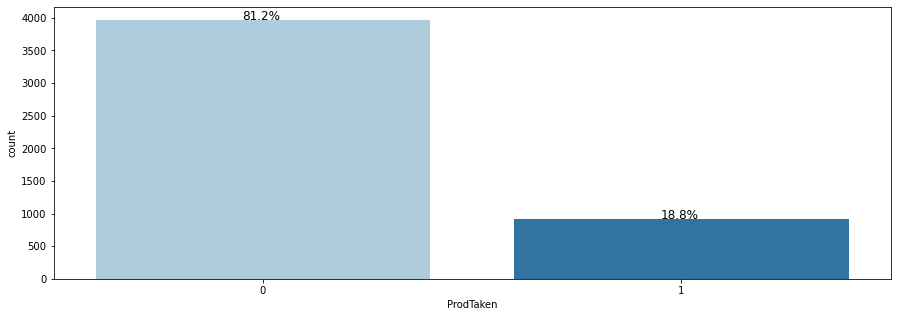

In [23]:
perc_on_bar('ProdTaken')


#### 18.8% of customers took the product

## Observation On TypeofContact


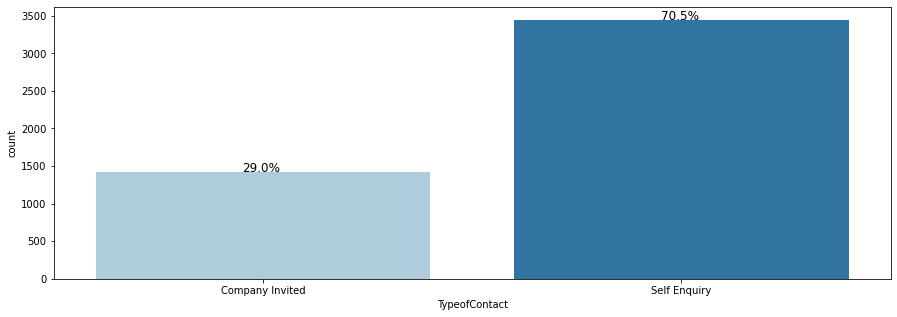

In [24]:
perc_on_bar('TypeofContact')

#### 70.5% of customers were self enquiry

## Observation On CityTier

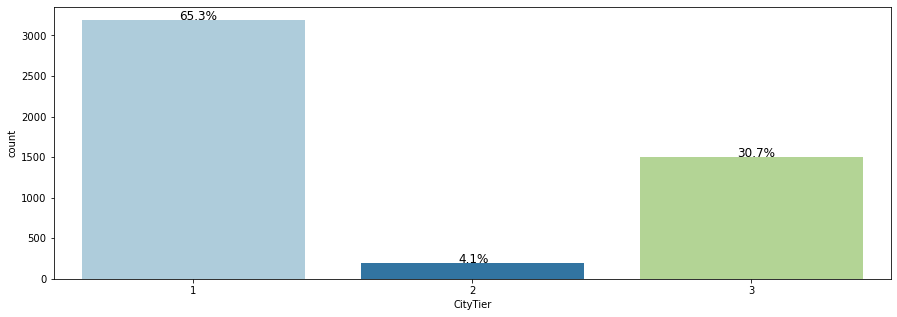

In [25]:
perc_on_bar('CityTier')

#### 65.3% of customers were from Tier 1

## Observation On Occupation

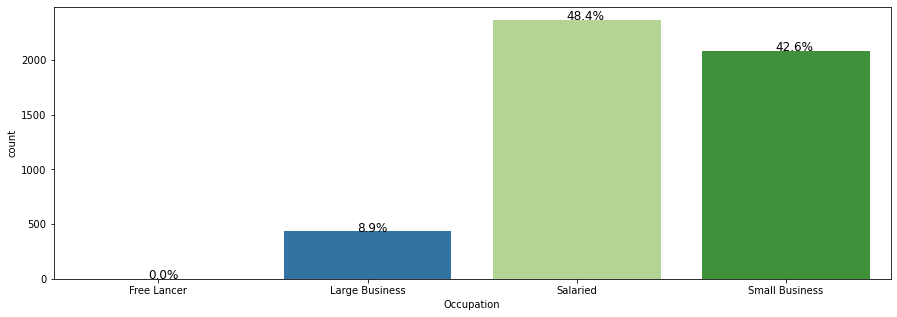

In [26]:
perc_on_bar('Occupation')

#### 48.4% of customers were salaried and 42.6% had small business

## Observation On Gender

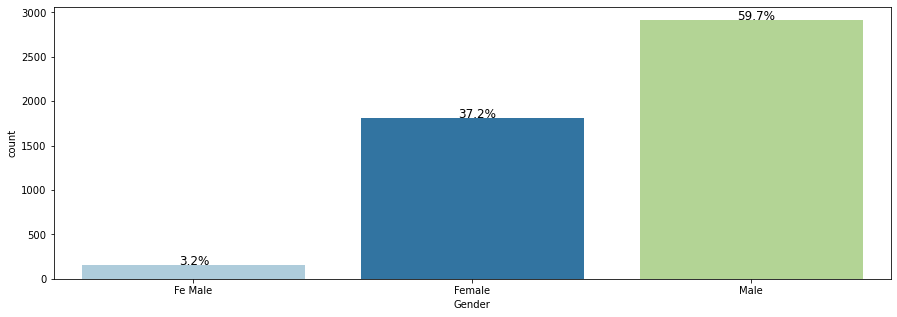

In [27]:
perc_on_bar('Gender')

#### 59.7% of customers were Male

## Observation On NumberOfPersonVisiting

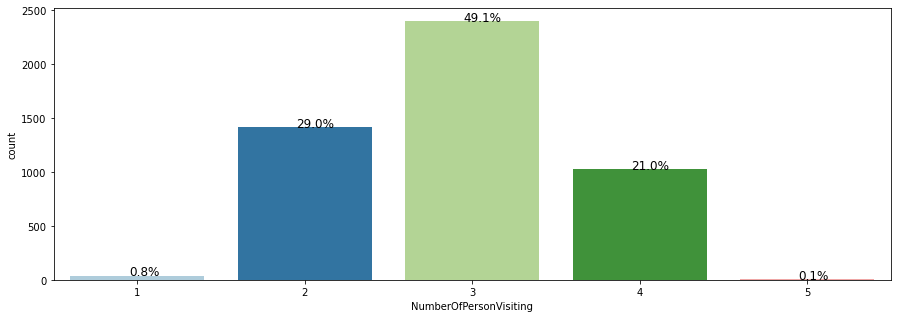

In [28]:
perc_on_bar('NumberOfPersonVisiting')

#### Half of person visiting were mostly 3 in number

## Observation On ProductPitched

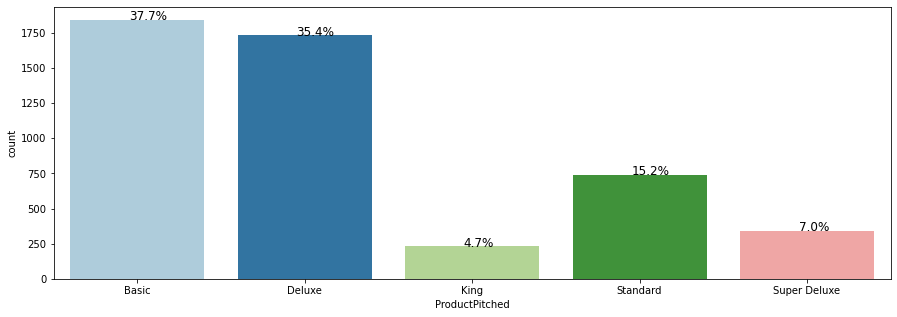

In [29]:
perc_on_bar('ProductPitched')

#### 37.7% of customers took Basic followed by 35.4% were Deluxe

## Observation On PreferredPropertyStar

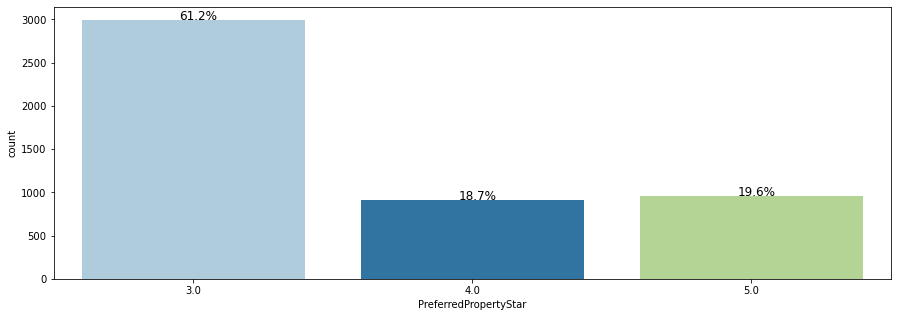

In [30]:
perc_on_bar('PreferredPropertyStar')

#### 61.2% of customers had preferredPropertyStar of 3

## Observation On MaritalStatus

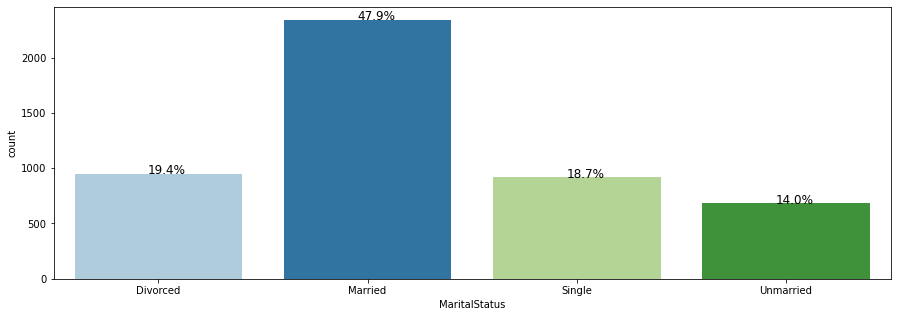

In [31]:
perc_on_bar('MaritalStatus')

#### 47.9% of customers were married

## Observation On Passport

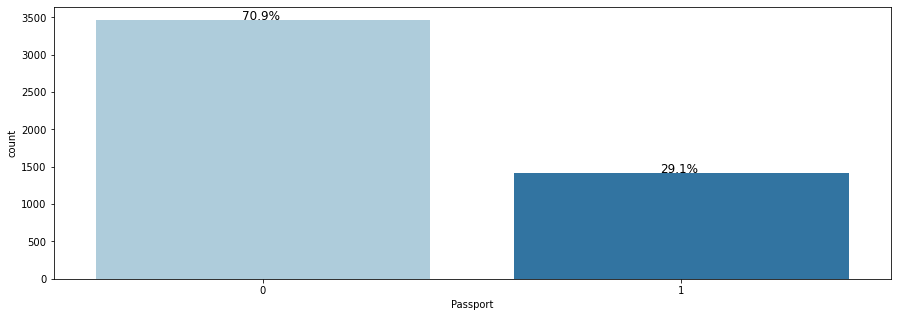

In [32]:
perc_on_bar('Passport')

#### 70.9% of customers didn't have passport

## Observation On PitchSatisfactionScore

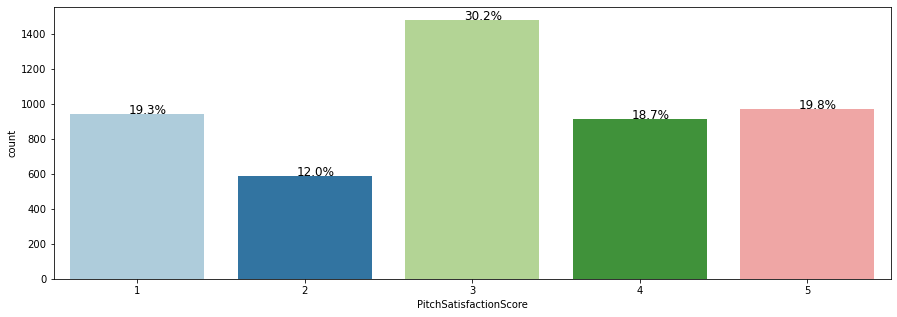

In [33]:
perc_on_bar('PitchSatisfactionScore')

#### 30.2% of customers had PitchSatisfactionScore of 30.2%

## Observation On OwnCar

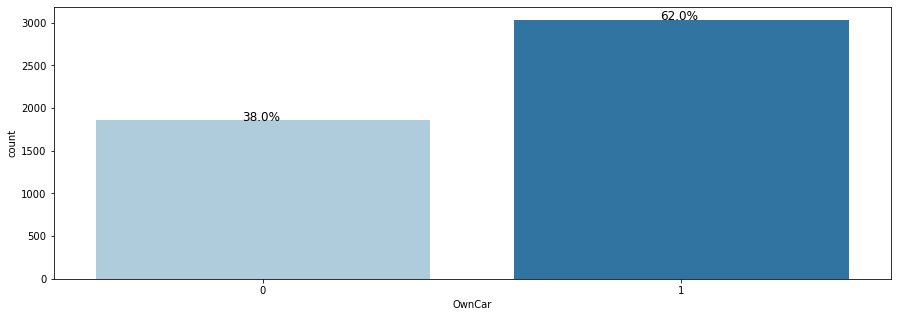

In [34]:
perc_on_bar('OwnCar')

#### 62% of customers had car

## Observation On NumberOfChildrenVisiting

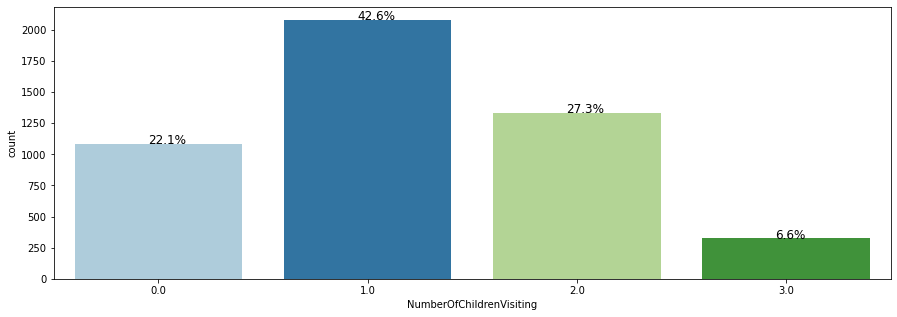

In [35]:
perc_on_bar('NumberOfChildrenVisiting')

#### 42.6% of customers had 1 children as NumberOfChildrenVisiting

## Observation On NumberOfFollowups

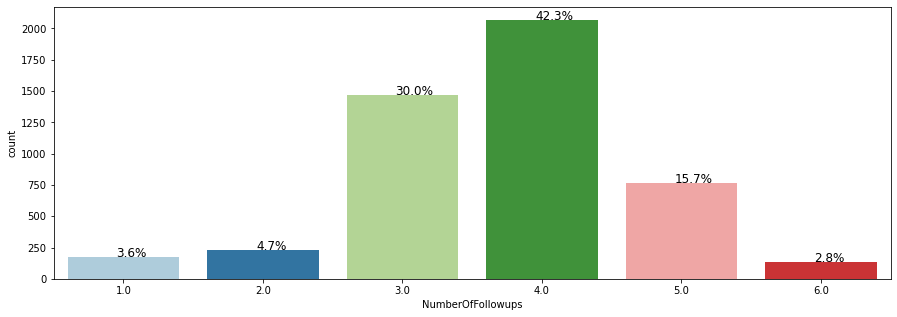

In [36]:
perc_on_bar('NumberOfFollowups')

#### 42.3% of customers took took 4 followups

## Observation On NumberOfTrips

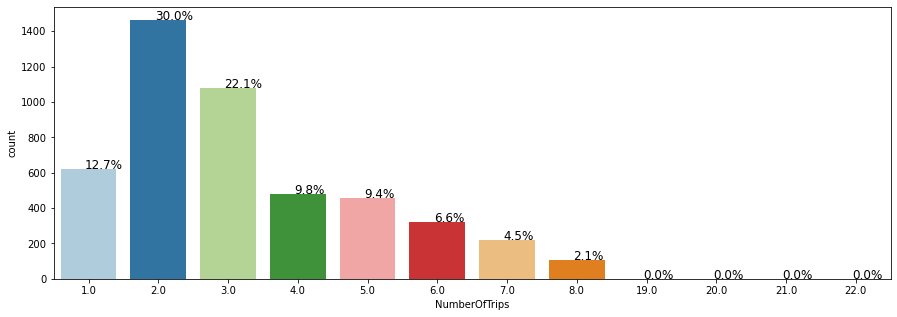

In [37]:
perc_on_bar('NumberOfTrips')

#### 30% of customers took 2 NumberOfTrips

## Observation On Designation

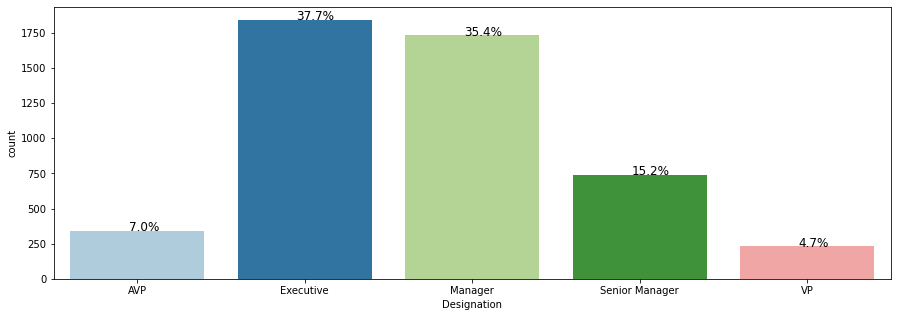

In [38]:
perc_on_bar('Designation')


#### 37.7% of customers had Designation of 37.7% and 35.4% were Managers

## Bivariate Analysis

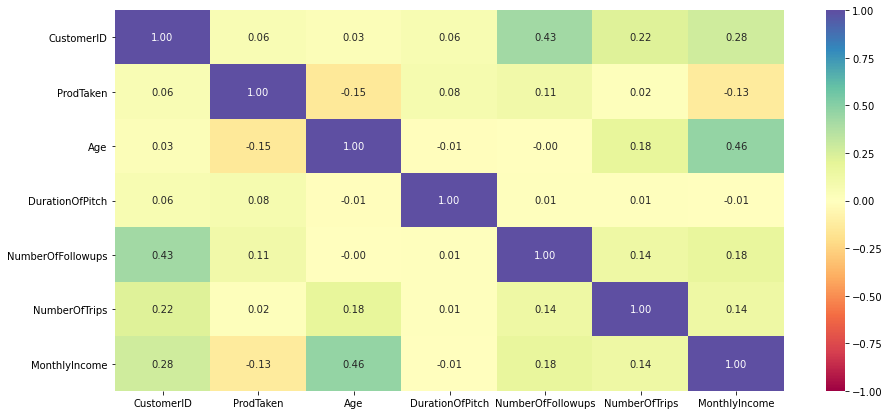

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

### We have low correlation amongst the features max we have is 0.46 b/w age and monthly income
### All correlation are positive except monthly income and ProdTaken

In [40]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

## Observation On City Tier Vs ProdTaken

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


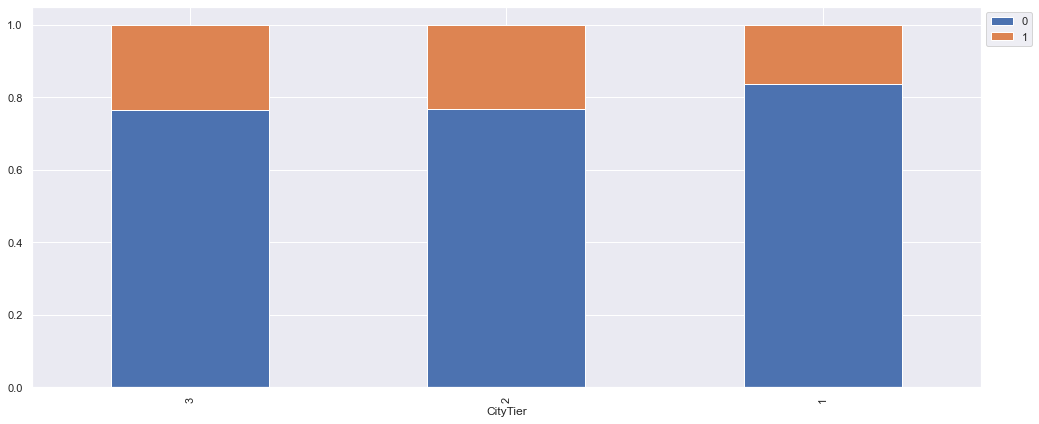

In [41]:
stacked_plot(data['CityTier'])

### Percentage of Prodtaken is higher in tier 2 and Tier 3 compared to tier1

## Observation On TypeofContact Vs ProdTaken

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


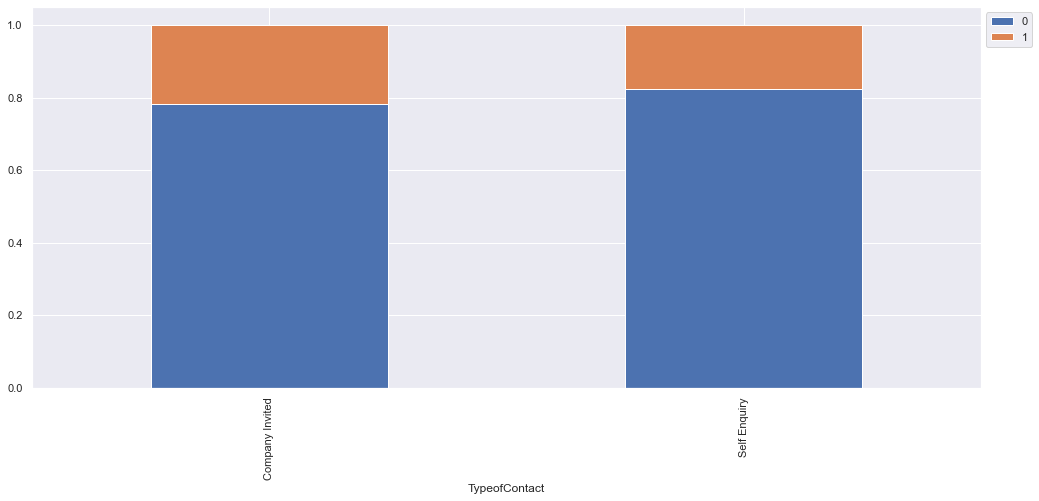

In [42]:
stacked_plot(data['TypeofContact'])

### Percentage of Prodtaken is higher amongst company invited compaed to Self Enquiry

## Observation On Occupation Vs ProdTaken

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


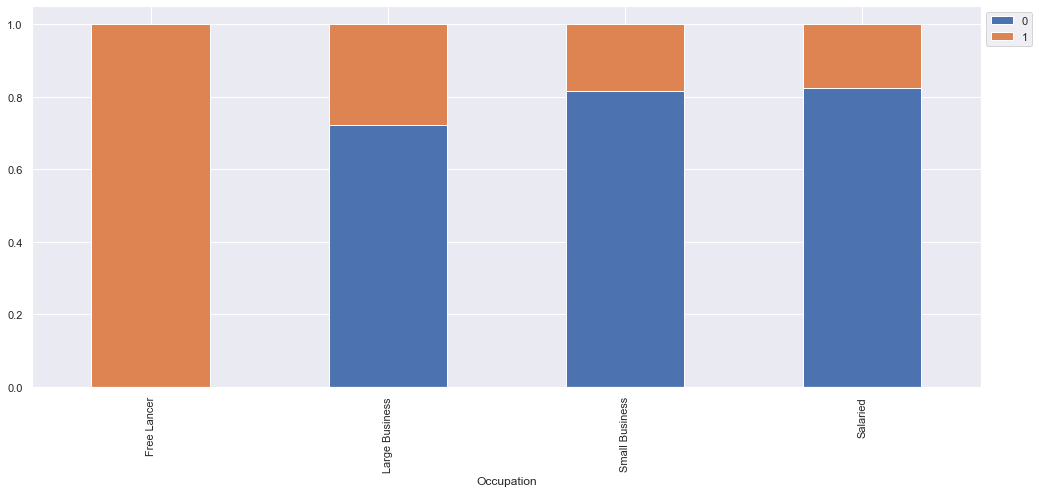

In [43]:
stacked_plot(data['Occupation'])

### All the freelancer took Produc
### Percentage of Prodtaken is higher in Large businesses  compared to Salaried and small Business

## Observation On NumberOfPersonVisiting Vs ProdTaken

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


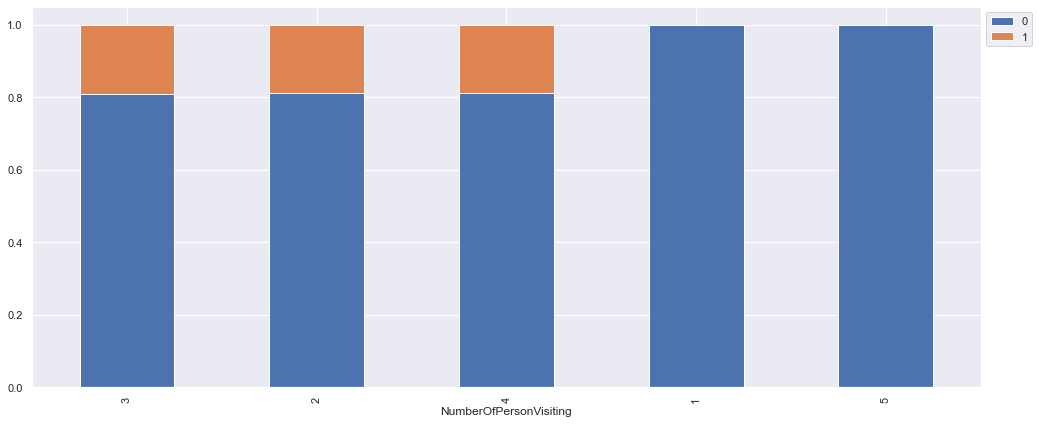

In [44]:
stacked_plot(data['NumberOfPersonVisiting'])

### Percentage of Prodtaken is higher if NumberofPersonVisiting is  2 or 3 or 4
### 1 or 5 NumberofPersonVisiting didn't take the Product

## Observation On ProductPitched Vs ProdTaken

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


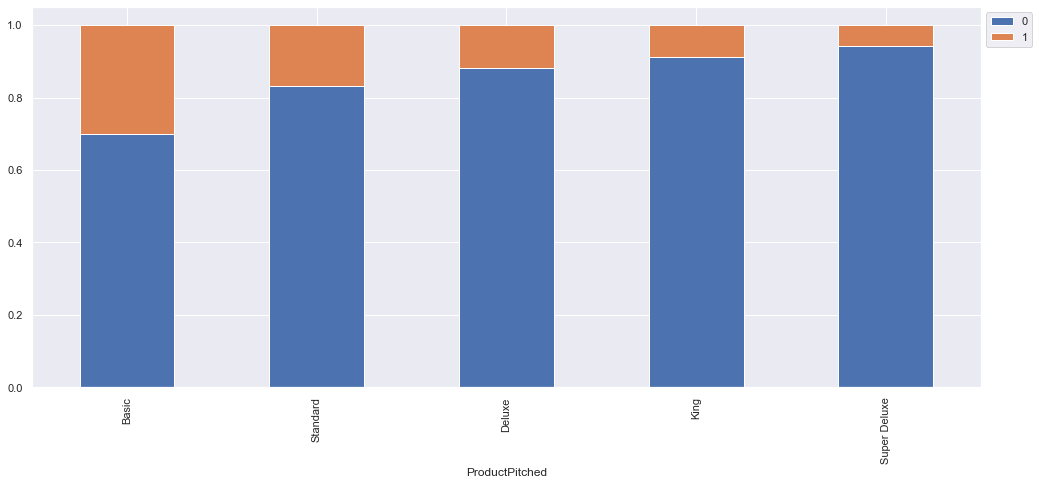

In [45]:
stacked_plot(data['ProductPitched'])

### Percentage of Prodtaken is higher in Basic and Standard productPitch

## Observation On PreferredPropertyStar Vs ProdTaken

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


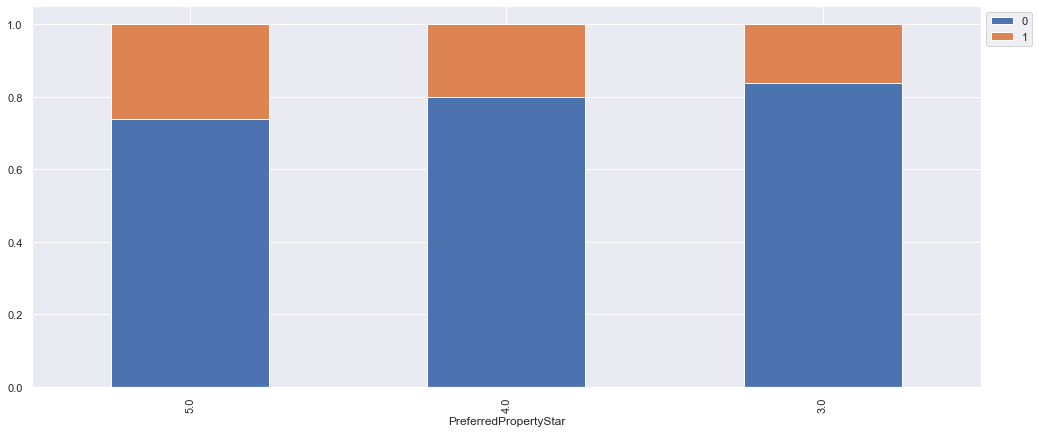

In [46]:
stacked_plot(data['PreferredPropertyStar'])

### Percentage of Prodtaken is higher if PreferredPropertyStar was 5

## Observation On MaritalStatus Vs ProdTaken

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


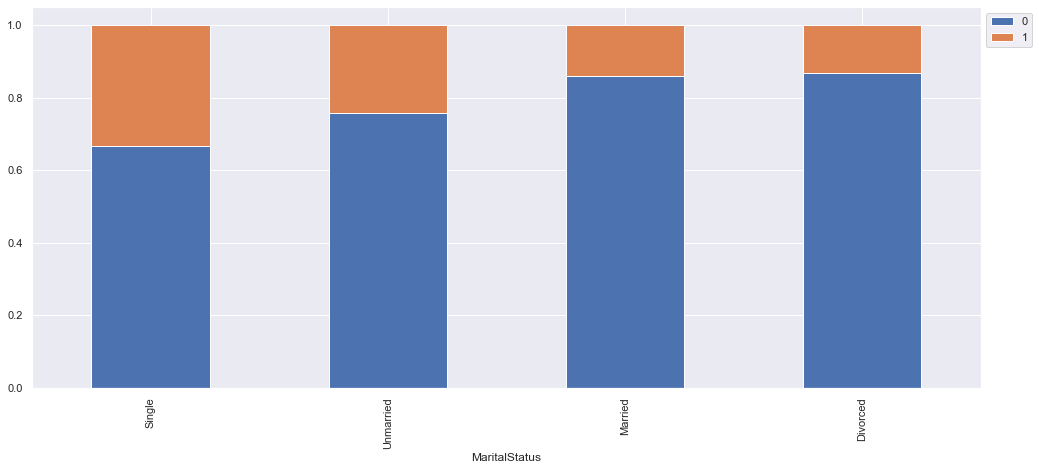

In [47]:
stacked_plot(data['MaritalStatus'])

### Percentage of Prodtaken is higher if they were single or unmarried

## Observation On Passport Vs ProdTaken

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


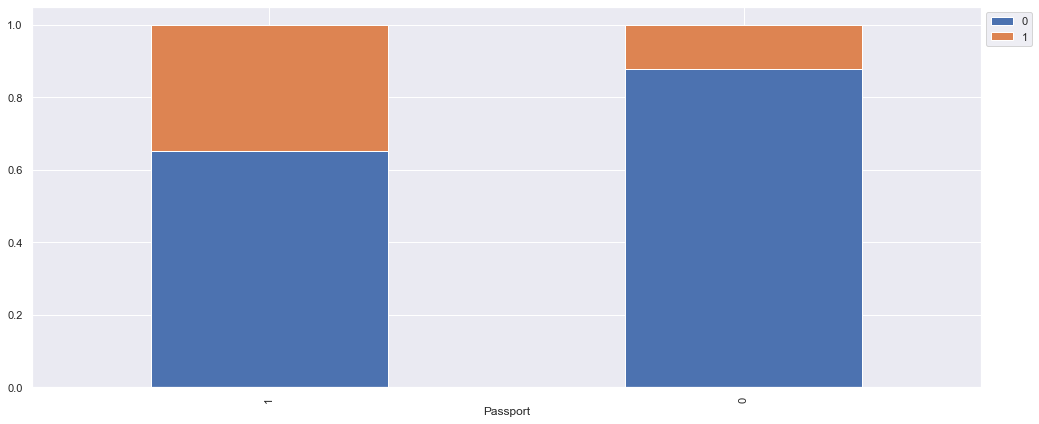

In [48]:
stacked_plot(data['Passport'])

### Percentage of Prodtaken is higher if they had Passport

## Observation On PitchSatisfactionScore Vs ProdTaken

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


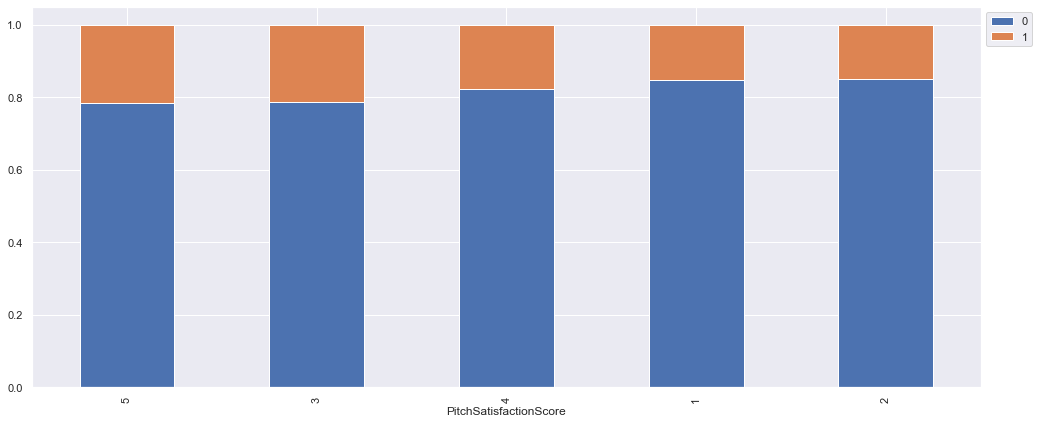

In [49]:
stacked_plot(data['PitchSatisfactionScore'])

### Percentage of Prodtaken is higher if PitchSatisfaction score was 3 or 5

## Observation On OwnCar Vs ProdTaken

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


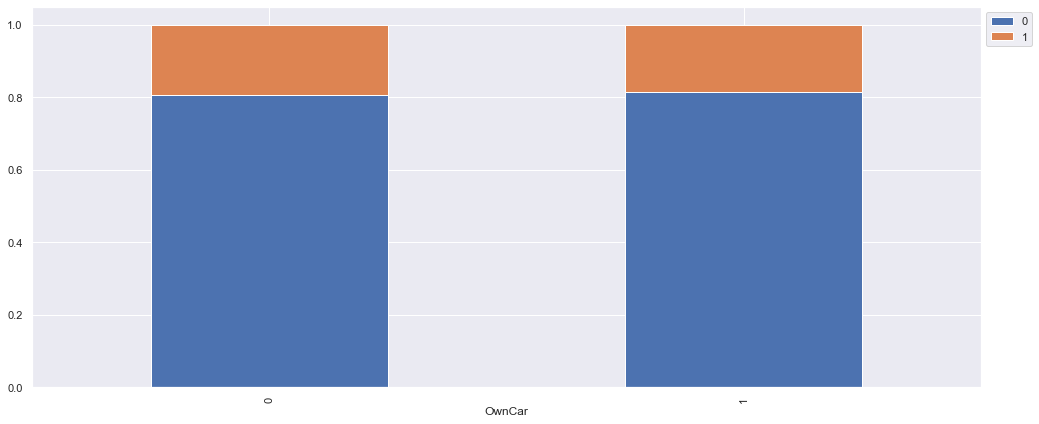

In [50]:
stacked_plot(data['OwnCar'])

### Percentage of Prodtaken didn't have impact with owning a car

## Observation On NumberOfChildrenVisiting Vs ProdTaken

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


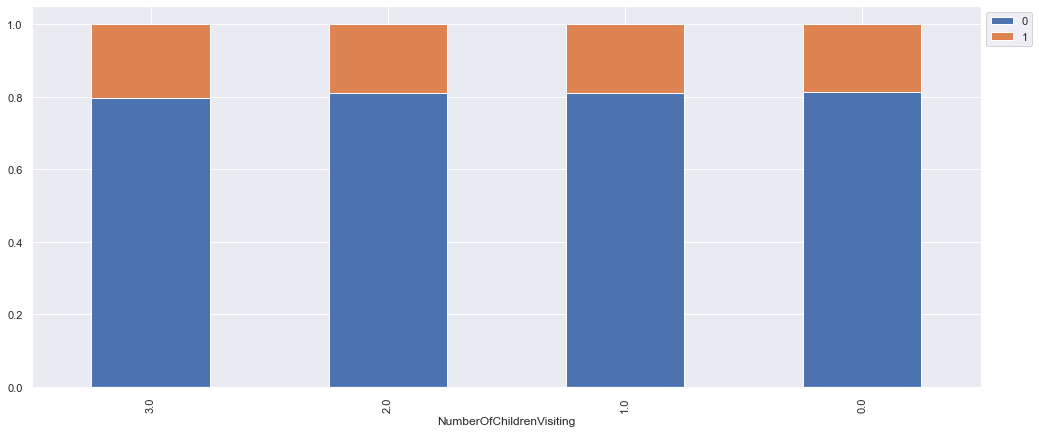

In [51]:
stacked_plot(data['NumberOfChildrenVisiting'])

### Percentage of Prodtaken didn't have any impact with NumberOfChildrenVisiting

## Observation On Designation Vs ProdTaken

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


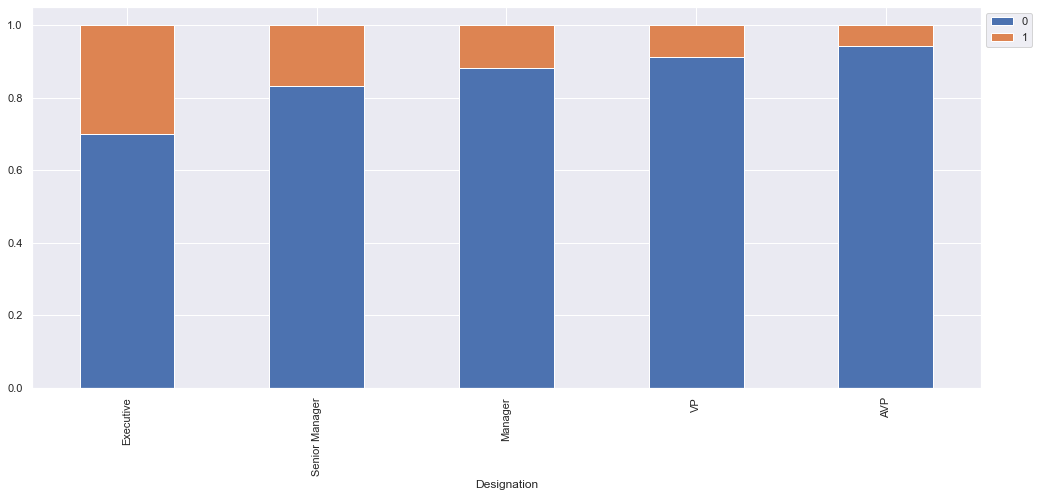

In [52]:
stacked_plot(data['Designation'])

### Percentage of Prodtaken is higher amongst Executives and Senior Managers

In [164]:
### Function to plot distributions and Boxplots of customers

def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x}  of customer who took Product',fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}  of customer who didn't take the product",fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t ProductTaken',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Personal Loan - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

## Observation On Age Vs ProdTaken

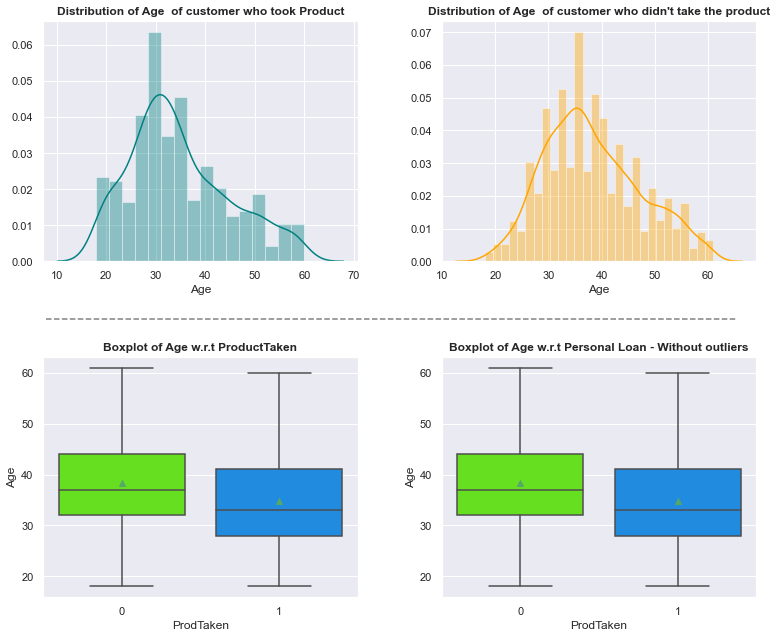

In [165]:
plot('Age')

### The Age vs Prodtaken is summetrical with average age of product takers in Lower 30's

## Observation On DurationOfPitch Tier Vs ProdTaken

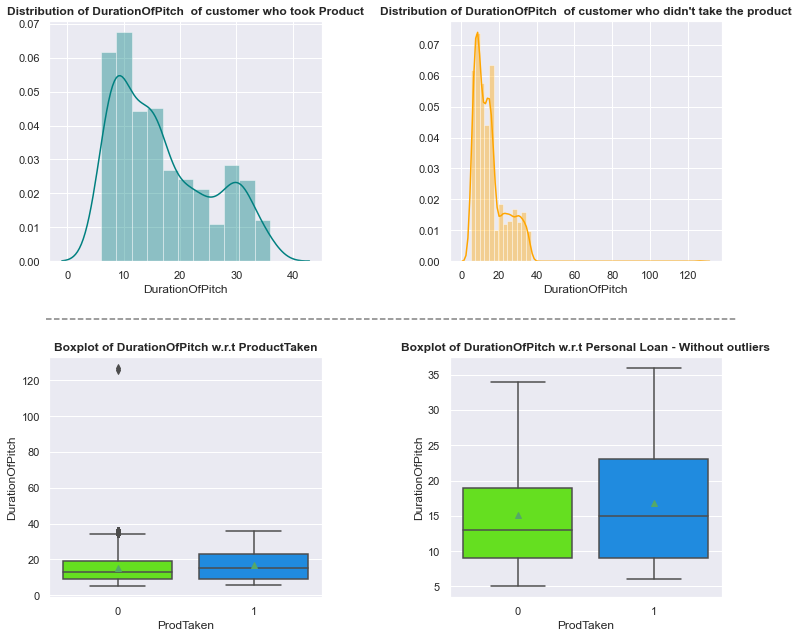

In [166]:
plot('DurationOfPitch')

### The DurationOfPitch vs Prodtaken is right skewed.
### The average Duration Pitch of ProdTaken was slightly higher compared to customers who didn't take product.

## Observation On NumberOfFollowups Vs ProdTaken

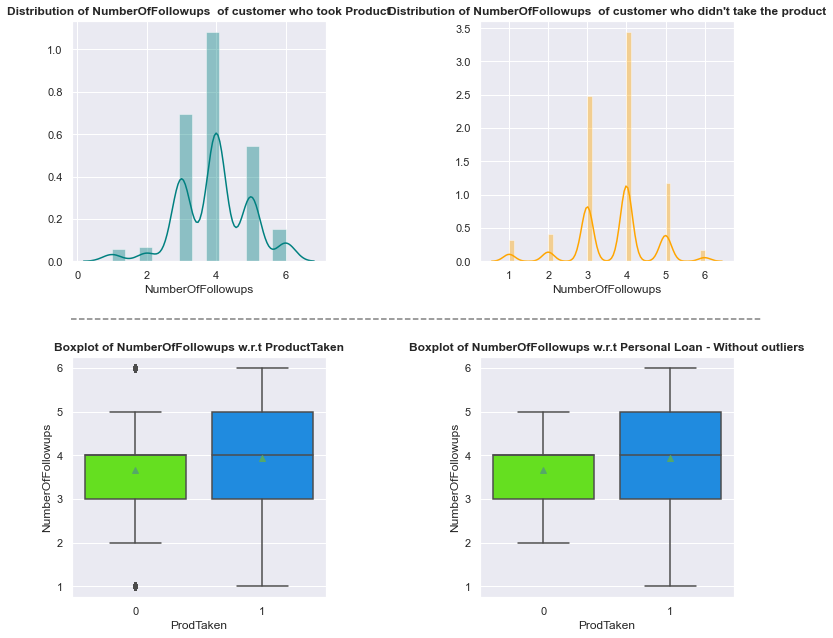

In [167]:
plot('NumberOfFollowups')

### The Number of followups vs Prodtaken is summetrical.
### Prodtakers had a high range and 50% numberof followups were 4 or more

## Observation On MonthlyIncome Vs ProdTaken

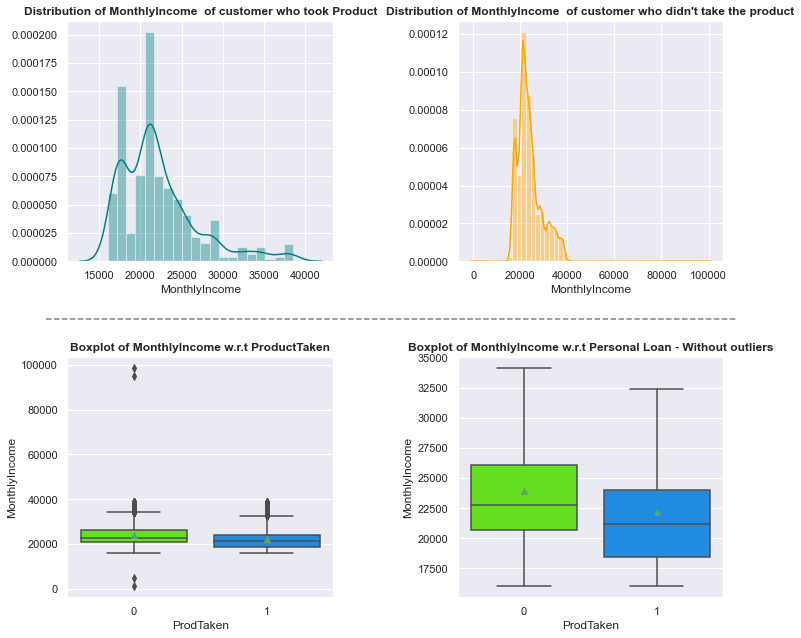

In [168]:
plot('MonthlyIncome')

### The MonthlyIncome vs Prodtaken isskewed with average prodtakers having lower income than non takers

## Observation On NumberOfTrips Vs ProdTaken

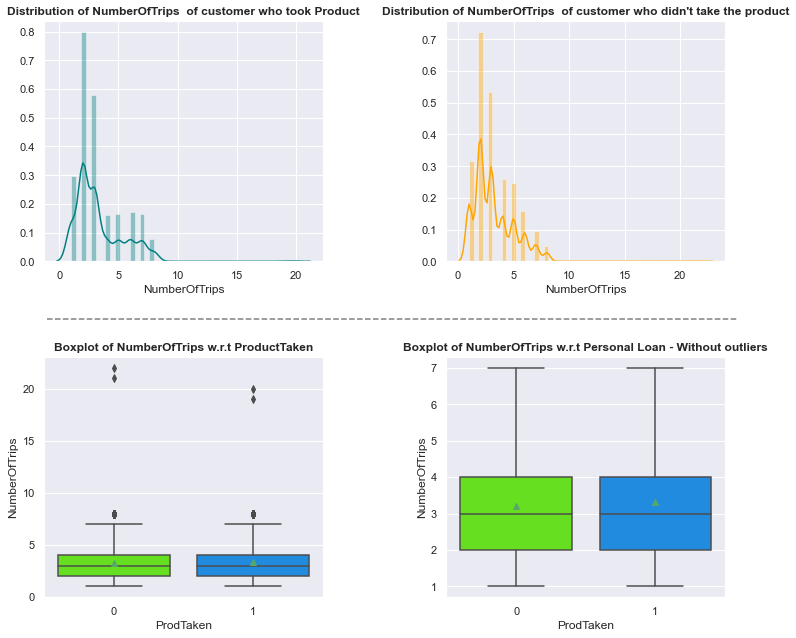

In [169]:
plot('NumberOfTrips')

### The Numberof trips vs Prodtaken is right skewed

## Data PreProcessing

In [59]:
data = data.drop(['CustomerID'], axis=1) # Let Drop Customer Id Column

In [60]:
data.isnull().sum() # Let us check for null values

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [61]:
data["PreferredPropertyStar"] = data["PreferredPropertyStar"].fillna(3) # Replace null values in PropertyStar by 3
data["TypeofContact"] = data["TypeofContact"].fillna('Self Enquiry') # Replace null values in TypeOfContact by Self Enquiry
data["NumberOfFollowups"] = data["NumberOfFollowups"].fillna(4) # Replace null values in NumberOfFollowups by 4
data["NumberOfChildrenVisiting"] = data["NumberOfChildrenVisiting"].fillna(1) # Replace null values in NumberOfChildren by 1


In [62]:
data["Age"] = data.groupby(["ProdTaken"])["Age"].transform(   # Replace null values in Age by median across prodtaken
    lambda x: x.fillna(x.median())
)
data["MonthlyIncome"] = data.groupby(["ProdTaken"])["MonthlyIncome"].transform( # Replace null values in MonthlyIncome by median across prodtaken
    lambda x: x.fillna(x.median())
)
data["DurationOfPitch"] = data.groupby(["ProdTaken"])["DurationOfPitch"].transform(  # Replace null values in duration by median across prodtaken
    lambda x: x.fillna(x.median())
)

In [63]:
data= data.dropna(axis=0, how='any') # Drop any other null values

In [64]:
data.isnull().sum() # check for any other null values

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [65]:
# Let us create dummy variables across Categorical Variables
data=pd.get_dummies(data, columns=["TypeofContact","CityTier","Occupation","Gender","NumberOfPersonVisiting","ProductPitched","PreferredPropertyStar","MaritalStatus","Passport","PitchSatisfactionScore","OwnCar","NumberOfChildrenVisiting","Designation"])

In [66]:
data.describe()

,ProdTaken,Age,DurationOfPitch,NumberOfFollowups,NumberOfTrips,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,CityTier_1,CityTier_2,CityTier_3,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Fe Male,Gender_Female,Gender_Male,NumberOfPersonVisiting_1,NumberOfPersonVisiting_2,NumberOfPersonVisiting_3,NumberOfPersonVisiting_4,NumberOfPersonVisiting_5,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,PreferredPropertyStar_3.0,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_0,Passport_1,PitchSatisfactionScore_1,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,OwnCar_0,OwnCar_1,NumberOfChildrenVisiting_0.0,NumberOfChildrenVisiting_1.0,NumberOfChildrenVisiting_2.0,NumberOfChildrenVisiting_3.0,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
count,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.00000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.00000,4748.000000,4748.000000,4748.000000,4748.000000
mean,0.191238,37.253159,15.431971,3.698821,3.236521,23169.272536,0.290859,0.709141,0.651011,0.039385,0.309604,0.000421,0.090986,0.483993,0.424600,0.032645,0.373420,0.593934,0.008214,0.297810,0.488837,0.204507,0.000632,0.386900,0.364364,0.031171,0.156066,0.06150,0.616470,0.188500,0.195029,0.192713,0.476411,0.187237,0.143639,0.708509,0.291491,0.192713,0.118997,0.304339,0.187447,0.196504,0.381634,0.618366,0.227885,0.440817,0.267481,0.063816,0.06150,0.386900,0.364364,0.156066,0.031171
std,0.393318,9.016635,8.337658,1.002978,1.849019,4786.014159,0.454207,0.454207,0.476701,0.194530,0.462379,0.020522,0.287619,0.499796,0.494334,0.177725,0.483763,0.491149,0.090268,0.457344,0.499928,0.403384,0.025131,0.487092,0.481302,0.173798,0.362956,0.24027,0.486297,0.391152,0.396265,0.394471,0.499496,0.390143,0.350761,0.454497,0.454497,0.394471,0.323820,0.460175,0.390311,0.397396,0.485839,0.485839,0.419512,0.496537,0.442692,0.244451,0.24027,0.487092,0.481302,0.362956,0.173798
min,0.000000,18.000000,5.000000,1.000000,1.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,9.000000,3.000000,2.000000,20403.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,36.000000,13.000000,4.000000,3.000000,22375.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,

# Data Prepration

In [67]:
X = data.drop('ProdTaken', axis=1) # Let us keep all as independent variable except ProdTaken
y = data['ProdTaken'] # Let us consider ProdTaken as dependent variable

In [68]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [69]:
X_train.shape, X_test.shape # Let us check for rows and colums in test and train data

((3323, 52), (1425, 52))

# Model Building

# Bagging

In [72]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Building the Model
### Bagging Classifier

In [75]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [76]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9945832079446284
Accuracy on test set :  0.9101754385964912
Recall on training set :  0.9743178170144462
Recall on test set :  0.6
Precision on training set :  0.9967159277504105
Precision on test set :  0.9243243243243243


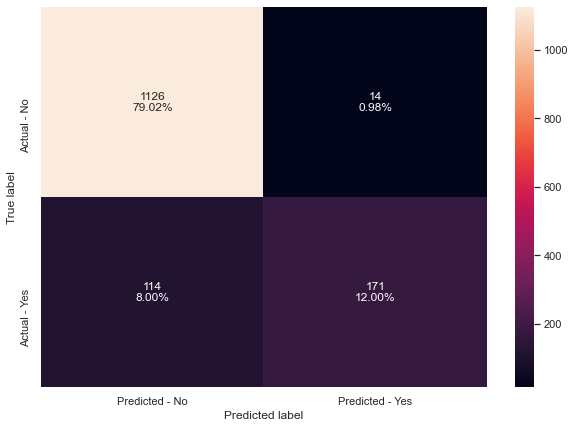

In [77]:
make_confusion_matrix(bagging_estimator,y_test)

# Random forest classifier

In [79]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [80]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9087719298245615
Recall on training set :  1.0
Recall on test set :  0.5649122807017544
Precision on training set :  1.0
Precision on test set :  0.9640718562874252


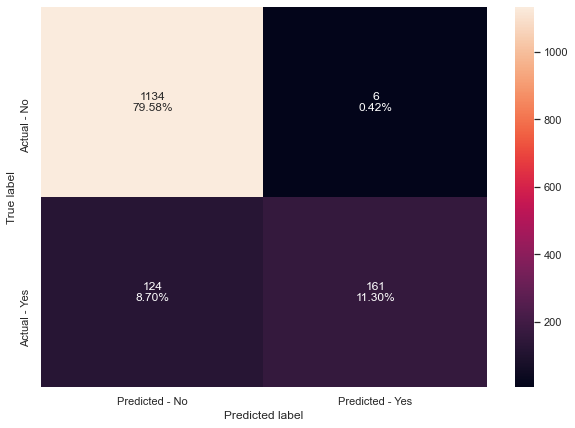

In [81]:
make_confusion_matrix(rf_estimator,y_test)

In [ ]:
With default parameters:

Both models - Bagging classifiers as well as random forest classifier are overfitting the train data.
Both models are giving similar performance in terms of accuracy but bagging classifier is giving better recall.

## Hyperparameters Bagging classifier

In [83]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

In [84]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9990972013241047
Accuracy on test set :  0.9235087719298246
Recall on training set :  0.9951845906902087
Recall on test set :  0.6421052631578947
Precision on training set :  1.0
Precision on test set :  0.9631578947368421


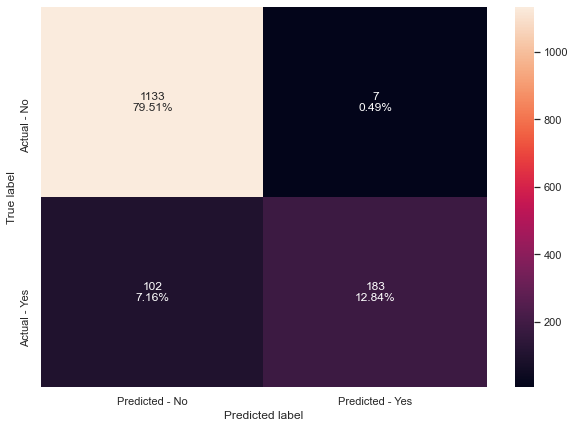

In [85]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

## Insights
#### We can see that train accuracy and recall for the bagging classifier have increased slightly after hyperparameter tuning but the test recall has decreased.
#### The model is overfitting the data, as train accuracy and recall are much higher than the test accuracy and test recall.
#### The confusion matrix shows that the model is better at identifying non-defaulters as compared to defaulters.
#### Let's try using logistic regression as the base estimator for bagging classifier:
#### Now, let's try and change the base_estimator of the bagging classifier, which is a decision tree by default.
#### We will pass the logistic regression as the base estimator for bagging classifier.

## Let's try using logistic regression as the base estimator for bagging classifier:

In [87]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  random_state=1)

In [88]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.8465242250978032
Accuracy on test set :  0.8378947368421052
Recall on training set :  0.26324237560192615
Recall on test set :  0.26666666666666666
Precision on training set :  0.7627906976744186
Precision on test set :  0.7755102040816326


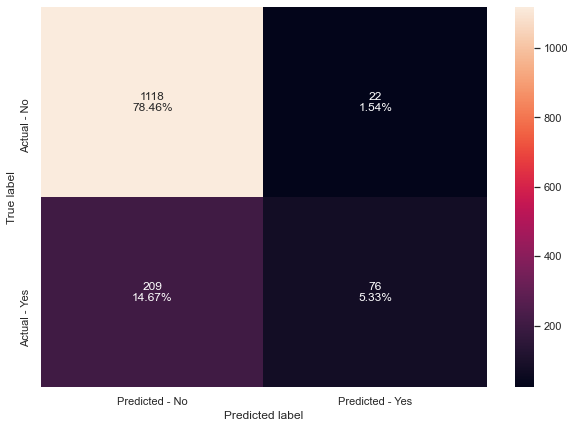

In [89]:
make_confusion_matrix(bagging_lr,y_test)

### Insights
#### Bagging classifier with logistic regression as base_estimator is not overfitting the data but the test recall is extremely low.
#### Ensemble models are less interpretable than decision tree but bagging classifier is even less interpretable than random forest. It does not even have a feature importance attribute

# Random Forest Classifier

In [91]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=250, random_state=1)

In [92]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9136322600060186
Accuracy on test set :  0.8687719298245614
Recall on training set :  0.565008025682183
Recall on test set :  0.3929824561403509
Precision on training set :  0.9565217391304348
Precision on test set :  0.8888888888888888


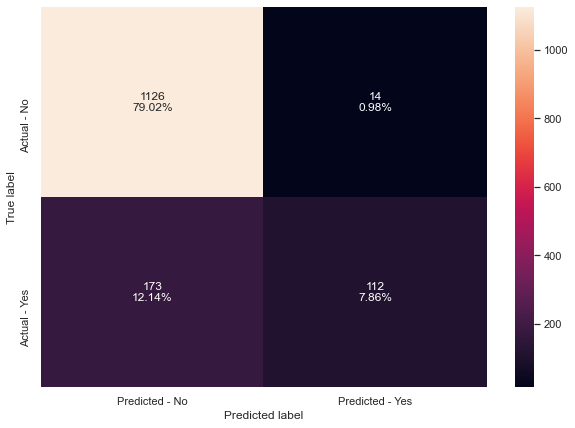

In [93]:
make_confusion_matrix(rf_estimator_tuned,y_test)

### Insights
#### We can see that random forest's performance has increased as compared to the random forest model with default parameters.
#### Model is slightly overfitting the data but not as much as the tuned bagging classifier.
#### The test recall is still very low. This means that the model is not good at identifying defaulters which is our primary aim here.

# Let's try using class_weights for random forest:

In [95]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=7,
                       n_estimators=200, random_state=1)

In [96]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.9133313271140535
Accuracy on test set :  0.872280701754386
Recall on training set :  0.7110754414125201
Recall on test set :  0.5368421052631579
Precision on training set :  0.8039927404718693
Precision on test set :  0.7536945812807881


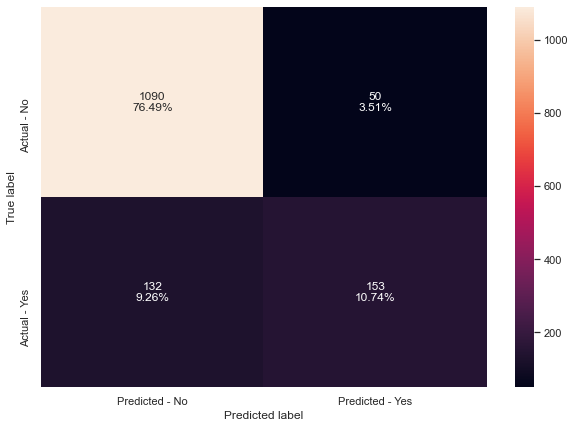

In [97]:
make_confusion_matrix(rf_estimator_weighted,y_test)

### Insights
#### The model accuracy has decreased a bit but the overfitting has also been reduced and the model is generalizing well.
#### The train and test recall both have increased but it is still low.
#### We can see from the confusion matrix that the random forest model with class weights is now better at identifying the defaulters as compared to other models.

# Checking feature importance

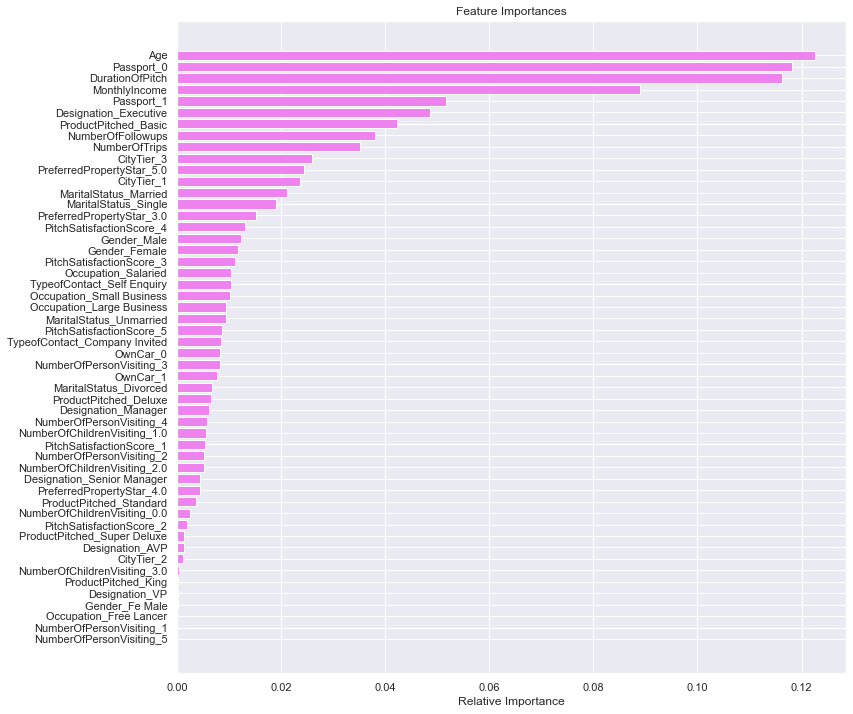

In [99]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Age, Passport, DurationOfPitch and Monthly income are top features

# Boosting

In [106]:
abc = AdaBoostClassifier(random_state=1) # ADA Bosting
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [107]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8537466145049654
Accuracy on test set :  0.8336842105263158
Recall on training set :  0.3563402889245586
Recall on test set :  0.3508771929824561
Precision on training set :  0.7231270358306189
Precision on test set :  0.6578947368421053


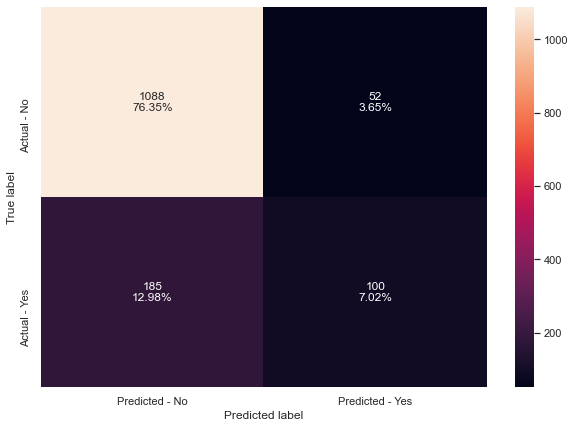

In [108]:
make_confusion_matrix(abc,y_test)

# Gradient Boosting Algorithm

In [111]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [112]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8955762864881132
Accuracy on test set :  0.8652631578947368
Recall on training set :  0.5008025682182986
Recall on test set :  0.41403508771929826
Precision on training set :  0.896551724137931
Precision on test set :  0.8251748251748252


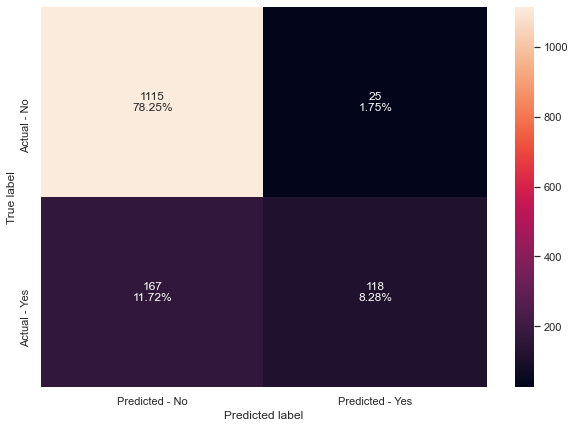

In [113]:
make_confusion_matrix(gbc,y_test)

# XG Boost Classifier

In [116]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[15:33:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9996990671080349
Accuracy on test set :  0.9249122807017544
Recall on training set :  0.9983948635634029
Recall on test set :  0.6807017543859649
Precision on training set :  1.0
Precision on test set :  0.9238095238095239


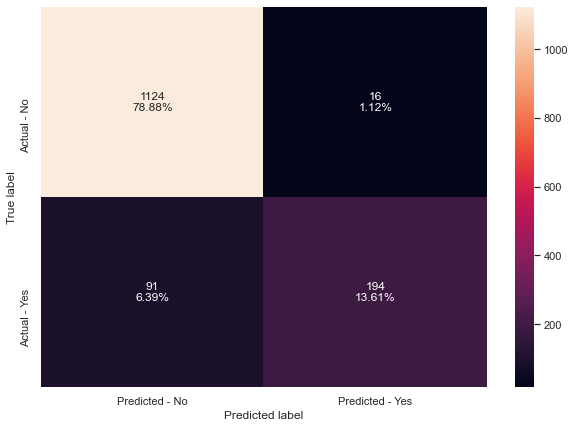

In [118]:
make_confusion_matrix(xgb,y_test)

### Insights
#### With default parameters:

#### XGboost classifier has better test accuracy among these 3 models.
#### Adaboost classifier has least test accuracy and test recall.

# Hyperparameter Tuning

In [122]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.5000000000000002, n_estimators=90,
                   random_state=1)

In [123]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9933794763767679
Accuracy on test set :  0.8842105263157894
Recall on training set :  0.9743178170144462
Recall on test set :  0.5894736842105263
Precision on training set :  0.9902120717781403
Precision on test set :  0.7777777777777778


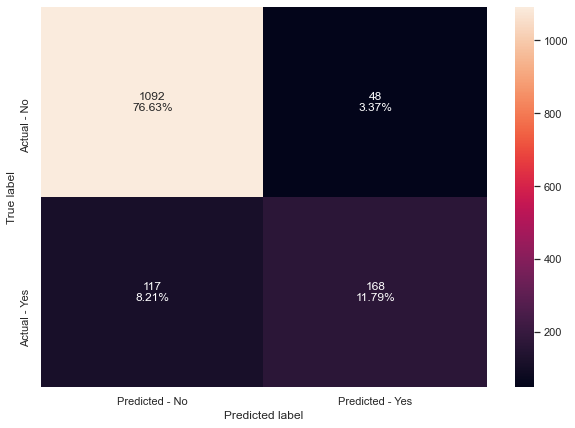

In [124]:
make_confusion_matrix(abc_tuned,y_test)

### Insights
#### The model is overfitting the train data as train accuracy is much higher than the test accuracy.
#### The model has low test recall. This implies that the model is not good at identifying defaulters.

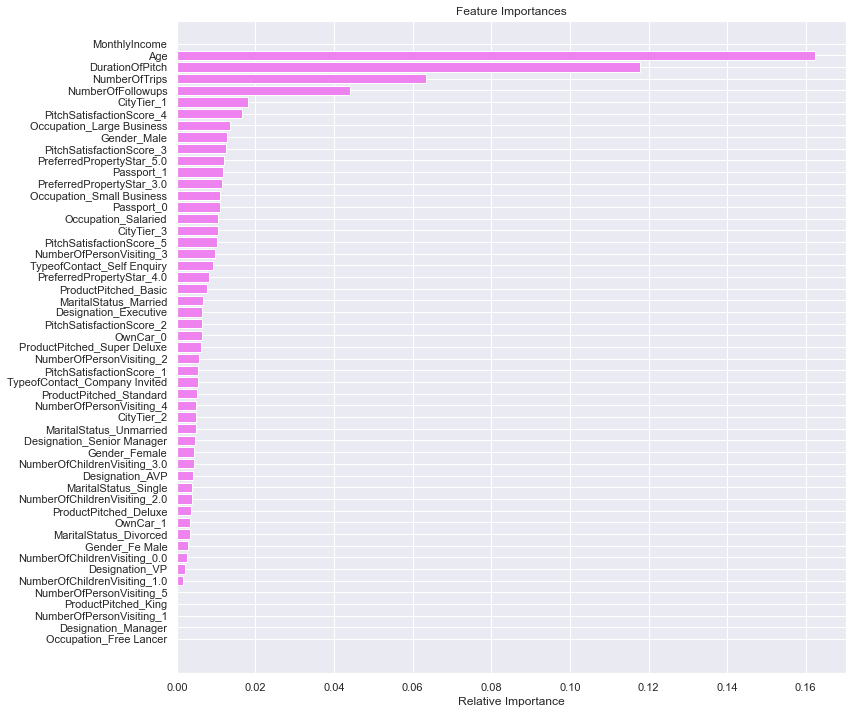

In [125]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Monthly income, age, Durationofpitch and Number of trips are top features

# Gradient boosting classifier

In [127]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [128]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8943725549202528
Accuracy on test set :  0.8610526315789474
Recall on training set :  0.49759229534510435
Recall on test set :  0.4
Precision on training set :  0.8908045977011494
Precision on test set :  0.8085106382978723


### As compared to the model with default parameters:

#### Test accuracy have increased slightly, but recall is still low.
#### As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [129]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

In [130]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9337947637676798
Accuracy on test set :  0.8849122807017544
Recall on training set :  0.6853932584269663
Recall on test set :  0.4982456140350877
Precision on training set :  0.9467849223946785
Precision on test set :  0.8711656441717791


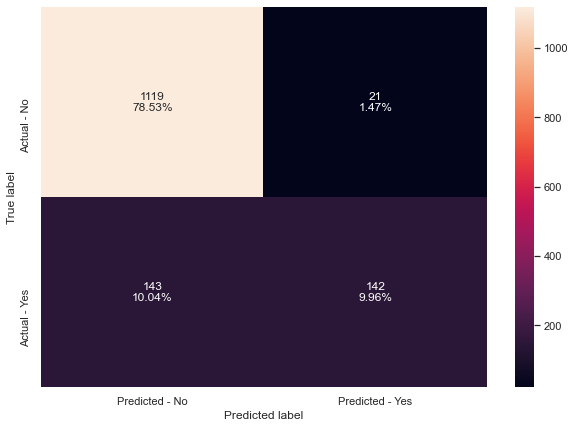

In [131]:
make_confusion_matrix(gbc_tuned,y_test)

### Insights
#### The model performace has not increased by much.
#### The model has started to overfit the train data in terms of recall.
#### It is better at identifying non-defaulters than identifying defaulters.

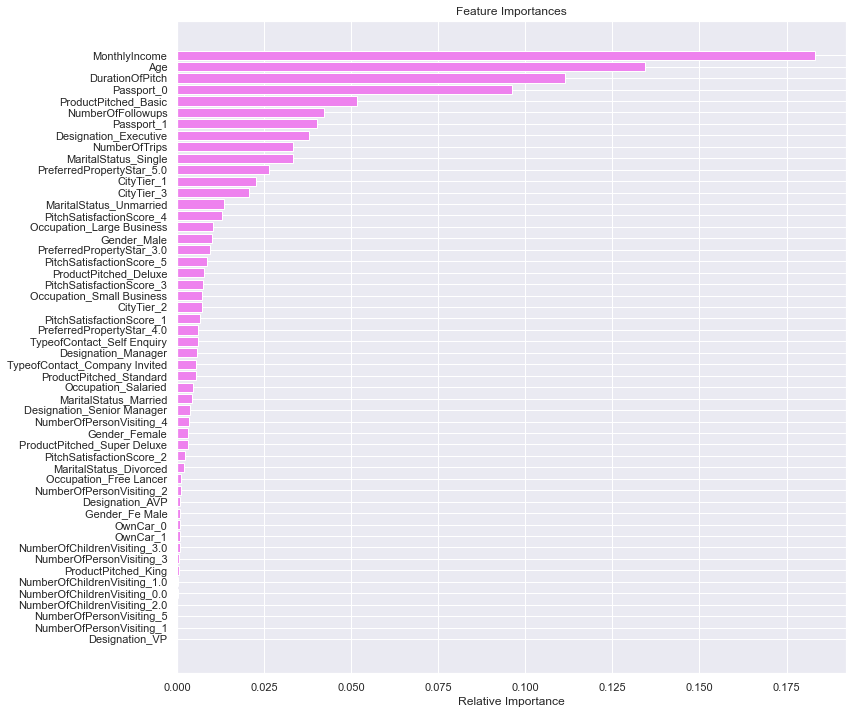

In [132]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Monthly income, Age and drationofPitch remain as important features

 #

In [163]:

#

In [161]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted,abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [162]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights','AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.99,0.91,0.97,0.60,1.00,0.92
1,Tuned Bagging Classifier,1.00,0.92,1.00,0.64,1.00,0.96
2,Bagging classifier with base_estimator=LR,0.85,0.84,0.26,0.27,0.76,0.78
3,Random Forest with deafult parameters,1.00,0.91,1.00,0.56,1.00,0.96
4,Tuned Random Forest Classifier,0.91,0.87,0.57,0.39,0.96,0.89
5,Random Forest with class_weights,0.91,0.87,0.71,0.54,0.80,0.75
6,AdaBoost with default paramters,0.85,0.83,0.36,0.35,0.72,0.66
7,AdaBoost Tuned,0.99,0.88,0.97,0.59,0.99,0.78
8,Gradient Boosting with default parameters,0.90,0.87,0.50,0.41,0.90,0.83
9,Gradient Boosting with init=AdaBoost,0.89,0.86,0.50,0.40,0.89,0.81


### Based on all the models that we have built I would recommend Tuned Bagging classifier or XGBoost with default parameters